In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zarr

In [2]:
thresholded_zarr =  '../../snakemake-thresholding/data/ngff_example/my_image'

In [3]:
os.listdir(thresholded_zarr)

['1', '.zattrs', '.zgroup', 'labels', '0', 'tables']

In [4]:
z1 = zarr.open(thresholded_zarr)

In [5]:
z1.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,4
No. arrays,2
No. groups,2
Arrays,"0, 1"
Groups,"labels, tables"


In [16]:
z1.attrs.asdict()

{'multiscales': [{'axes': [{'name': 'c', 'type': 'channel'},
    {'name': 'z', 'type': 'space', 'unit': 'micrometer'},
    {'name': 'y', 'type': 'space', 'unit': 'micrometer'},
    {'name': 'x', 'type': 'space', 'unit': 'micrometer'}],
   'datasets': [{'coordinateTransformations': [{'scale': [1, 1.0, 0.65, 0.65],
       'type': 'scale'}],
     'path': '0'},
    {'coordinateTransformations': [{'scale': [1, 1.0, 1.3, 1.3],
       'type': 'scale'}],
     'path': '1'}],
   'version': '0.4'}],
 'omero': {'channels': [{'color': '00FFFF',
    'label': 'DAPI',
    'wavelength_id': 'A01_C01',
    'window': {'end': 700, 'max': 65535, 'min': 0, 'start': 0}}],
  'id': 1,
  'name': 'TBD',
  'version': '0.4'}}

In [17]:
original_0 = z1['0']

In [18]:
np.array(original_0).shape

(1, 2, 540, 1280)

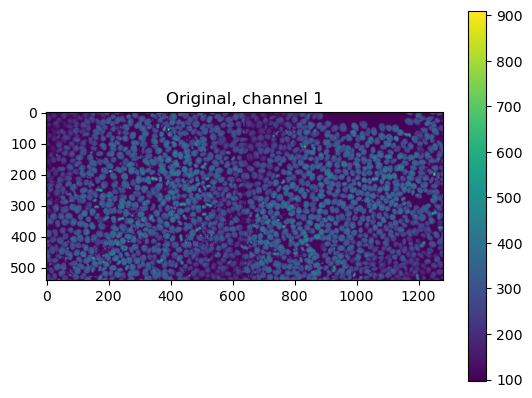

In [19]:
plt.imshow(np.array(original_0)[0, 1, ...])
plt.title('Original, channel 1')
plt.colorbar()

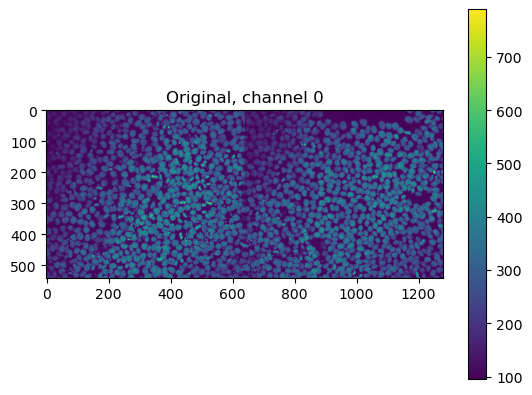

In [20]:
plt.imshow(np.array(original_0)[0, 0, ...])
plt.title('Original, channel 0')
plt.colorbar()

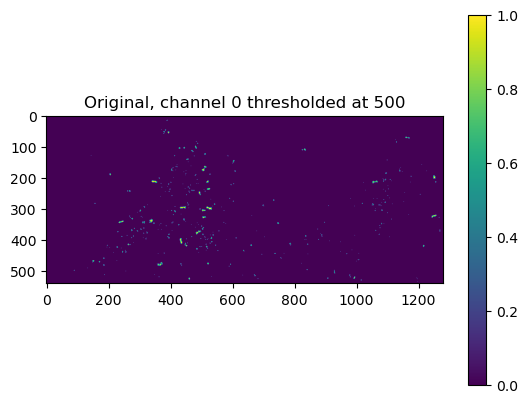

In [21]:
threshold_value = 500
plt.imshow(np.array(original_0)[0, 0, ...] > threshold_value)
plt.title(f'Original, channel 0 thresholded at {threshold_value}')
plt.colorbar()

In [22]:
np.max(np.array(original_0))

909

In [23]:
np.min(np.array(original_0))

96

In [45]:
available_labels = list(map(lambda x: x[0], z1['labels'].items()))

print(f'Choose label to show from: {available_labels}')

Choose label to show from: ['threshold_napari_demo']


In [46]:
thresholded_0 = z1['labels']['threshold_napari_demo']['0']

In [47]:
thresholded_0

<zarr.core.Array '/labels/threshold_napari_demo/0' (2, 540, 1280) int32>

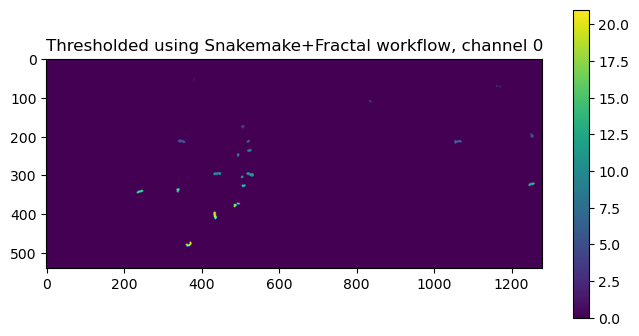

In [52]:
plt.figure(figsize=(8, 4))
plt.imshow(np.array(thresholded_0)[0, ...])
plt.title('Thresholded using Snakemake+Fractal workflow, channel 0')
plt.colorbar()

In [53]:
np.unique(np.array(thresholded_0)[0, ...])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int32)

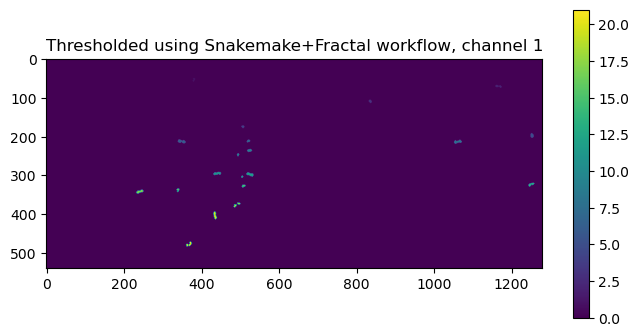

In [54]:
plt.figure(figsize=(8, 4))
plt.imshow(np.array(thresholded_0)[1, ...])
plt.title('Thresholded using Snakemake+Fractal workflow, channel 1')
plt.colorbar()

In [55]:
np.unique(np.array(thresholded_0)[1, ...])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int32)